# 1. Importação de Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
# Bibliotecas para gerar gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carregamento dos Dados

## 2.1. Colunas - Descrição
`numero_linha` – identificador da linha no dataset (apenas referência interna, não representa uma informação do cliente)

`id_cliente` – número de identificação único do cliente no banco

`sobrenome` – sobrenome do cliente

`score_credito` – pontuação de crédito do cliente, indicando seu histórico e confiabilidade financeira

`pais` – país de residência do cliente (por exemplo: França, Espanha, Alemanha)

`genero` – gênero do cliente

`idade` – idade do cliente em anos

`tempo_relacionamento` – número de anos que o cliente mantém relacionamento com o banco

`saldo` – saldo atual da conta bancária do cliente

`num_produtos` – quantidade de produtos financeiros que o cliente possui no banco (conta, cartão, empréstimo, etc.)

`possui_cartao_credito` – indica se o cliente possui cartão de crédito

- 0 = não

- 1 = sim

`membro_ativo` – indica se o cliente é considerado ativo pelo banco

- 0 = não ativo

- 1 = ativo

`salario_estimado` – estimativa de renda anual do cliente

`churned` – variável alvo do modelo

- 0 = cliente permanece no banco

- 1 = cliente saiu do banco

`reclamou` – indica se o cliente registrou alguma reclamação

- 0 = não

- 1 = sim

`score_satisfacao` – pontuação de satisfação do cliente em relação aos serviços do banco

`tipo_cartao` – tipo de cartão associado ao cliente (por exemplo: Silver, Gold, Platinum)

`pontos_acumulados` – quantidade de pontos acumulados pelo cliente em programas de recompensa ou fidelidade



In [ ]:
url = 'https://raw.githubusercontent.com/hackathon-ficaAi/churnInsight/refs/heads/main/churn_bancos/data/churn_bancos.csv'
df = pd.read_csv(url)
df.head()

,numero_linha,id_cliente,sobrenome,score_credito,pais,genero,idade,tempo_relacionamento,saldo,num_produtos,possui_cartao_credito,membro_ativo,salario_estimado,churned,reclamou,score_satisfacao,tipo_cartao,pontos_acumulados
0,1,15634602,Hargrave,619,frança,feminino,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,espanha,feminino,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,frança,feminino,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,frança,feminino,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,espanha,feminino,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
df.drop(columns=df.columns[:3], inplace=True)
df.head()

,score_credito,pais,genero,idade,tempo_relacionamento,saldo,num_produtos,possui_cartao_credito,membro_ativo,salario_estimado,churned,reclamou,score_satisfacao,tipo_cartao,pontos_acumulados
0,619,frança,feminino,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,espanha,feminino,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,frança,feminino,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,frança,feminino,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,espanha,feminino,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
df.shape

(10000, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   score_credito          10000 non-null  int64  
 1   pais                   10000 non-null  object 
 2   genero                 10000 non-null  object 
 3   idade                  10000 non-null  int64  
 4   tempo_relacionamento   10000 non-null  int64  
 5   saldo                  10000 non-null  float64
 6   num_produtos           10000 non-null  int64  
 7   possui_cartao_credito  10000 non-null  int64  
 8   membro_ativo           10000 non-null  int64  
 9   salario_estimado       10000 non-null  float64
 10  churned                10000 non-null  int64  
 11  reclamou               10000 non-null  int64  
 12  score_satisfacao       10000 non-null  int64  
 13  tipo_cartao            10000 non-null  object 
 14  pontos_acumulados      10000 non-null  int64  
dtypes: 

In [ ]:
df.isna().sum()

,0
score_credito,0
pais,0
genero,0
idade,0
tempo_relacionamento,0
saldo,0
num_produtos,0
possui_cartao_credito,0
membro_ativo,0
salario_estimado,0


In [ ]:
df.describe()

,score_credito,idade,tempo_relacionamento,saldo,num_produtos,possui_cartao_credito,membro_ativo,salario_estimado,churned,reclamou,score_satisfacao,pontos_acumulados
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
categoricas = df.select_dtypes(include=['object']).copy()
categoricas.describe()

,pais,genero,tipo_cartao
count,10000,10000,10000
unique,3,2,4
top,frança,masculino,DIAMOND
freq,5014,5457,2507


In [ ]:
num_cols = df.select_dtypes(include="number").columns

LIMIAR_BARRAS = 20  # ajuste se quiser

cols_bar = [
    col for col in num_cols
    if df[col].nunique() <= LIMIAR_BARRAS
]

cols_hist = [
    col for col in num_cols
    if df[col].nunique() > LIMIAR_BARRAS
]
cols_bar, cols_hist

(['tempo_relacionamento',
  'num_produtos',
  'possui_cartao_credito',
  'membro_ativo',
  'churned',
  'reclamou',
  'score_satisfacao'],
 ['score_credito', 'idade', 'saldo', 'salario_estimado', 'pontos_acumulados'])

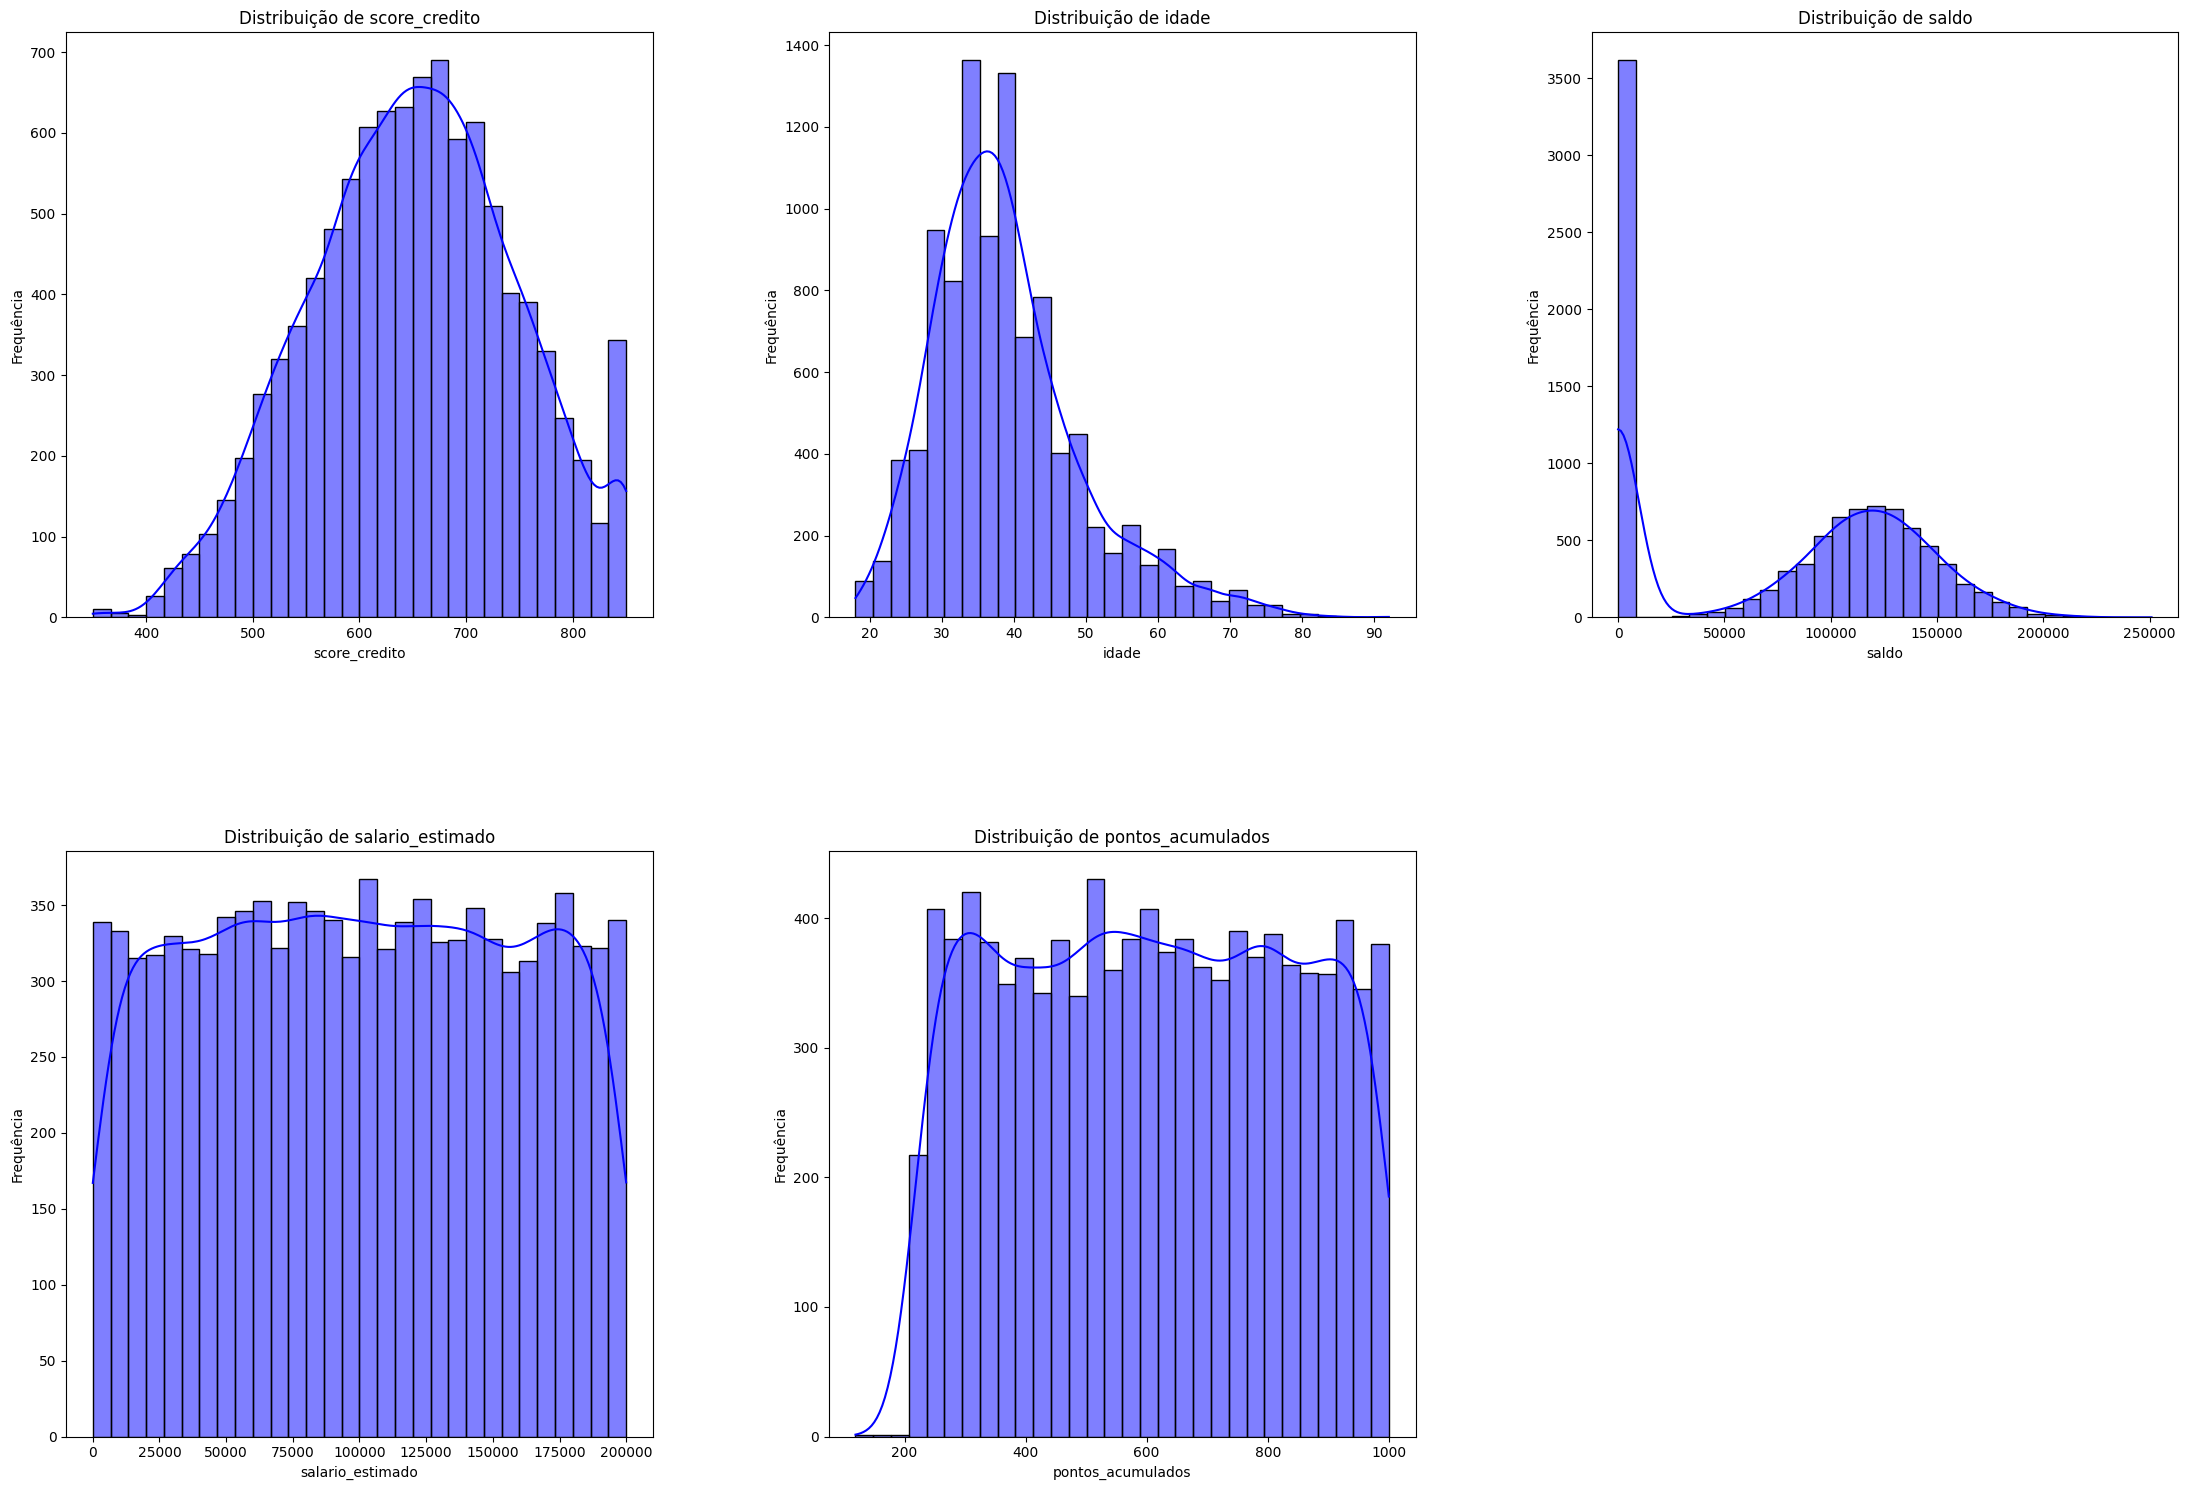

In [ ]:
plt.figure(figsize=(22,15))

for i, col in enumerate(cols_hist, 1):
    plt.subplot(2, 3, i) # 2 linhas , 3 coluna de gráficos
    sns.histplot(df[col], bins= 30, kde=True, color="blue")
    plt.title(f"Distribuição de {col}", fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Frequência", fontsize=10)

# Ajustando espaçamento entre os gráficos
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # hspace = altura, wspace = largura
plt.show()

Podemos notar uma inflação de zeros a serem tratados na coluna de saldos -- Provavelmente muitos clientes que possuem uma conta mas não fazem transações monetárias através dela.

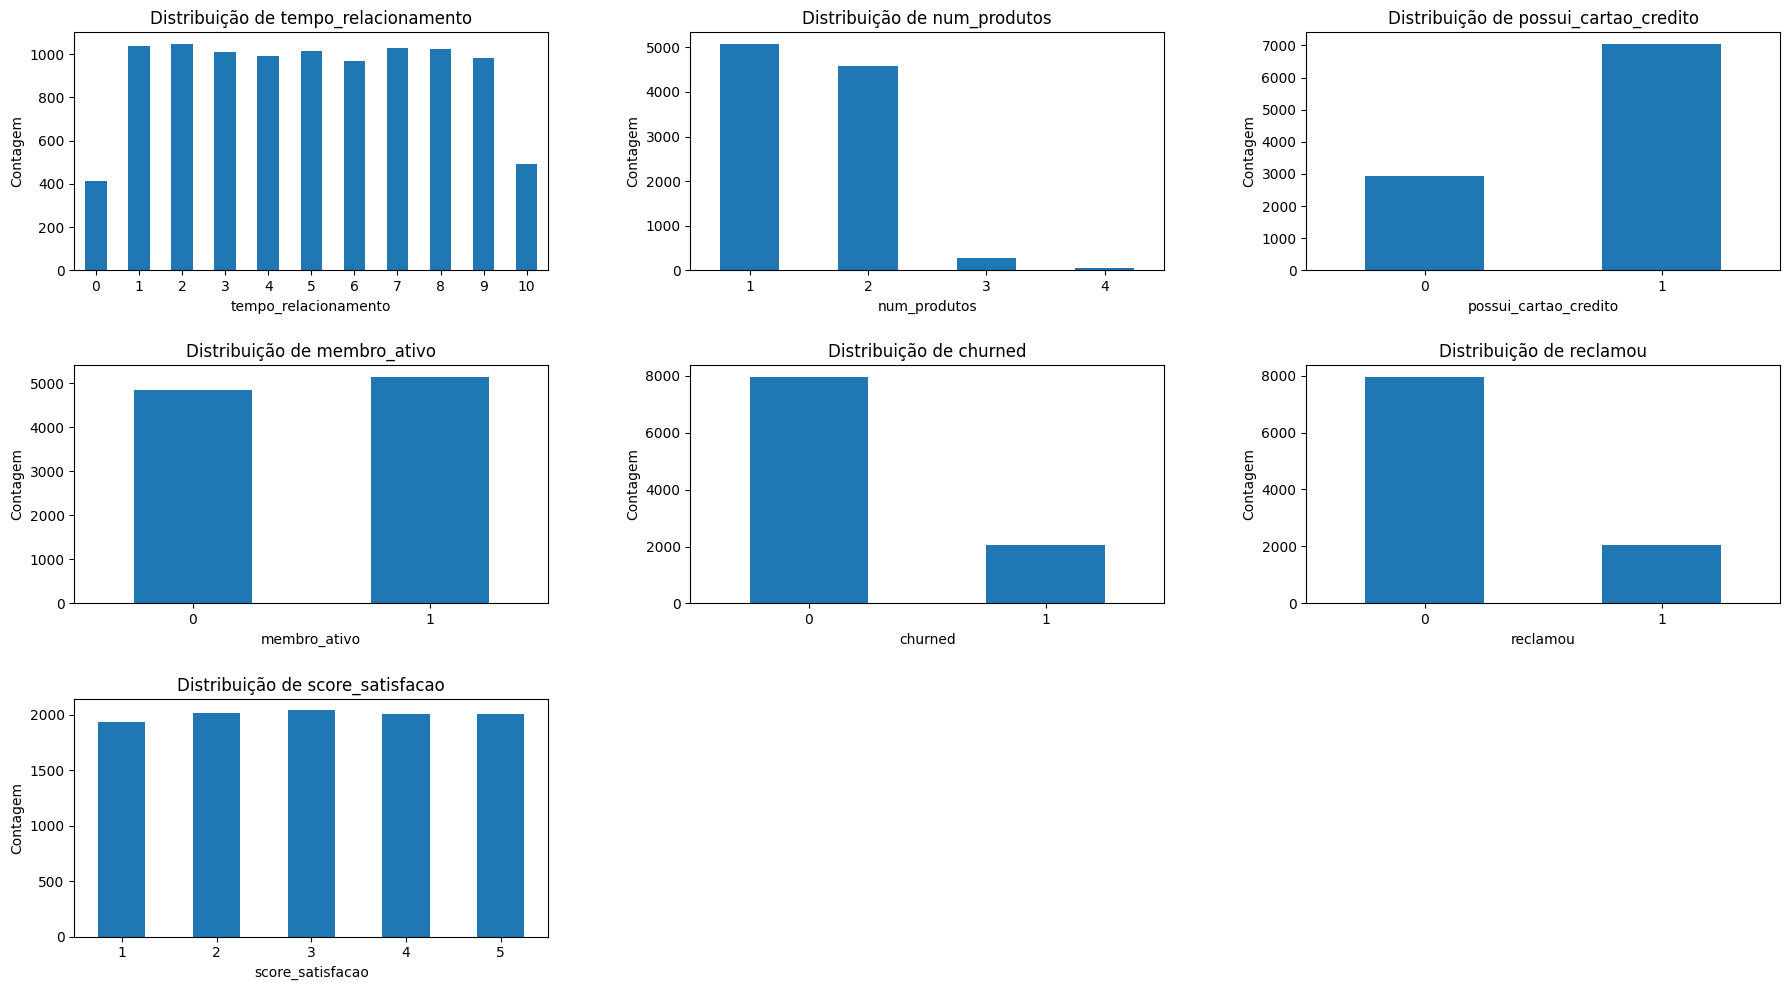

In [ ]:
plt.figure(figsize=(18,10))

for i, col in enumerate(cols_bar, 1):
    plt.subplot(3, 3, i) # 3 linhas , 3 coluna de gráficos
    df[col].value_counts().sort_index().plot(kind="bar")
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Contagem")
    plt.xticks(rotation=0)

# Ajustando espaçamento entre os gráficos
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


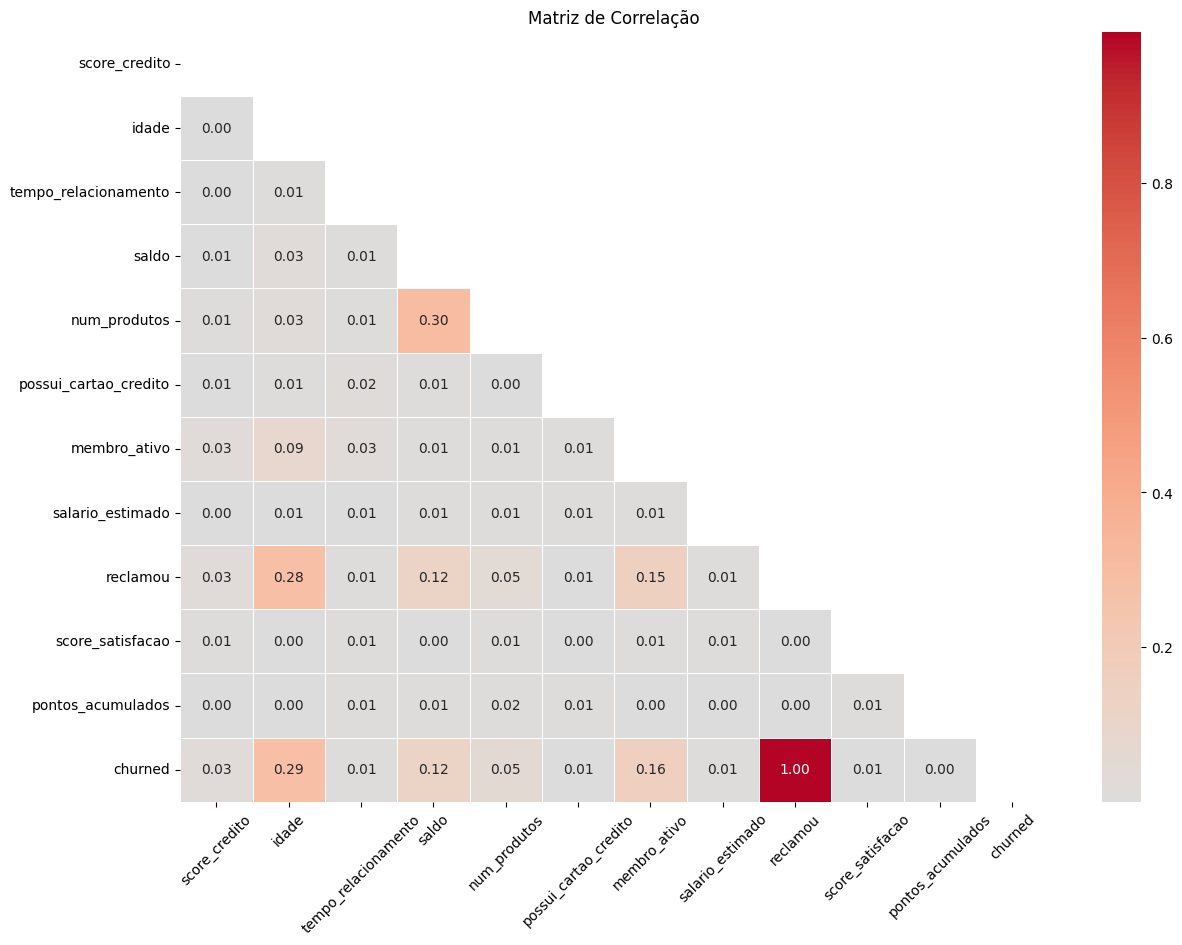

In [ ]:
num_cols = list(num_cols)
num_cols.remove('churned')
num_cols.append('churned')
corr_matrix = df[num_cols].corr().abs()
mask = np.triu(np.ones_like(corr_matrix,dtype=bool))

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)
plt.xticks(rotation=45)
plt.title('Matriz de Correlação')
plt.show()

Podemos notar que existe algumas colunas com alta correlação com a target "churned" como idade, saldo, se o consumidor é ativo ou não e se ele reclamou ou não.

Além disso, vemos que, além de estarem coorelacionadas entre si, o saldo está diretamente correlacionado com número de produtos.

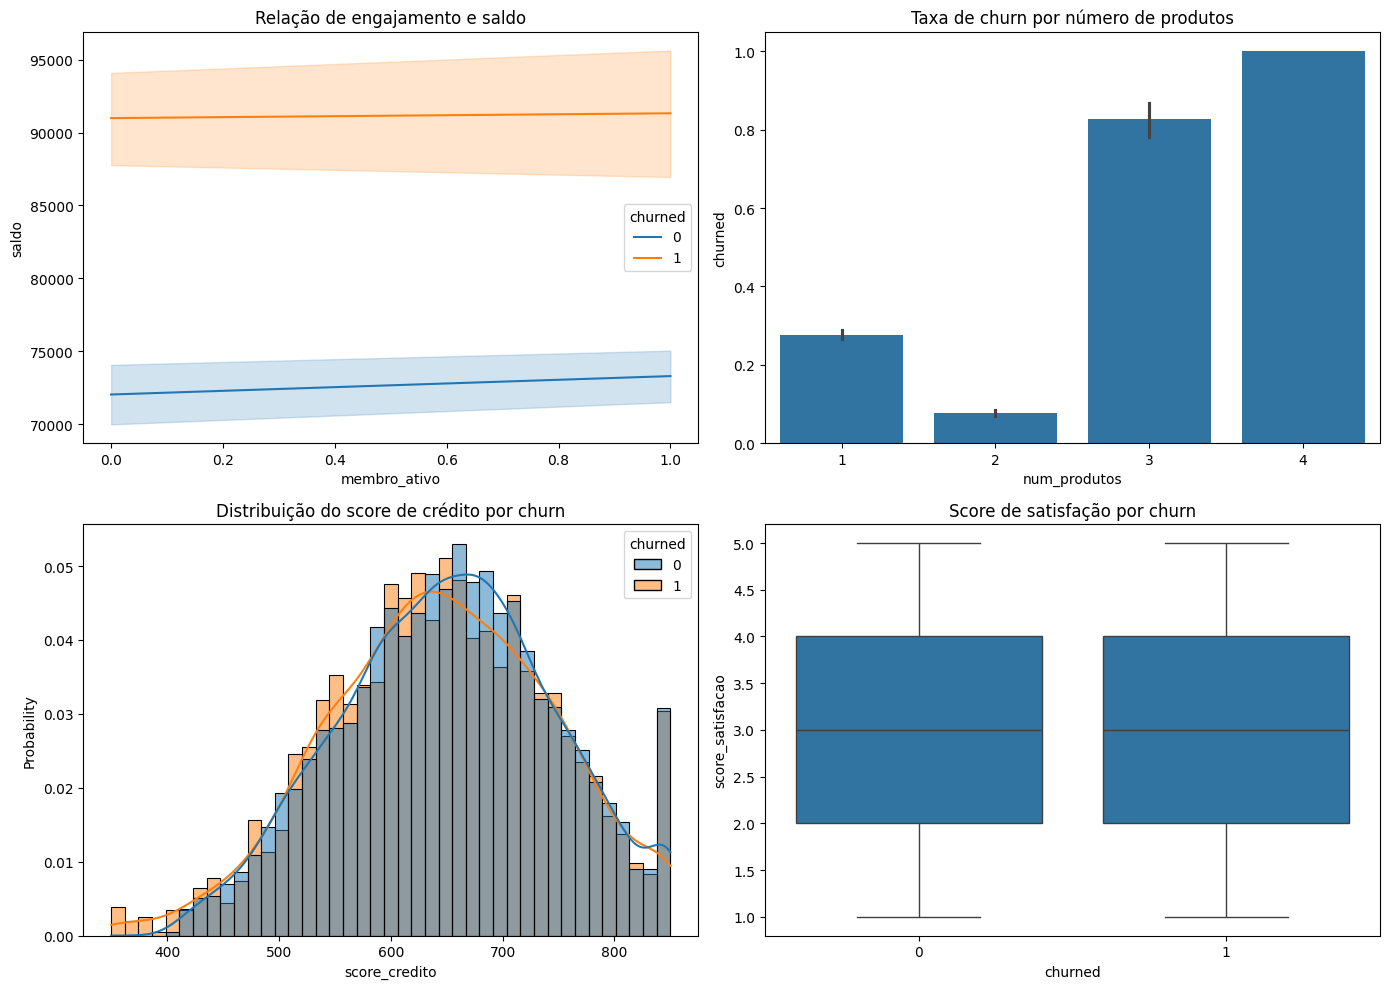

In [ ]:
# Criando figuras com 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1 — Engajamento × Valor
sns.lineplot(
    data=df,
    x='membro_ativo',
    y='saldo',
    hue='churned',
    ax=axes[0,0]
)
axes[0,0].set_title("Relação de engajamento e saldo")

# 2 — Produtos × churn
sns.barplot(
    data=df,
    x='num_produtos',
    y='churned',
    ax=axes[0,1]
)
axes[0,1].set_title("Taxa de churn por número de produtos")


# 3 — Score de crédito × Churn (histograma + KDE)
sns.histplot(
    data=df,
    x='score_credito',
    hue='churned',
    stat='probability',
    common_norm=False,
    kde=True,
    ax=axes[1,0]
)
axes[1,0].set_title("Distribuição do score de crédito por churn")

# 4 — idade × taxa skip
sns.boxplot(
    data=df,
    x='churned',
    y='score_satisfacao'
)
plt.title("Score de satisfação por churn")


plt.tight_layout()
plt.show()

In [ ]:
bins = 10
bin_edges = np.linspace(
    df['tempo_relacionamento'].min(),
    df['tempo_relacionamento'].max(),
    bins + 1
)

df['tempo_relacionamento_bin'] = pd.cut(
    df['tempo_relacionamento'],
    bins=bin_edges
)

taxa = (
    df.groupby('tempo_relacionamento_bin')['churned']
      .mean()
      .reset_index()
)

taxa['bin_center'] = taxa['tempo_relacionamento_bin'].apply(lambda x: x.mid)


/tmp/ipython-input-327909281.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tempo_relacionamento_bin')['churned']


/tmp/ipython-input-701293557.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


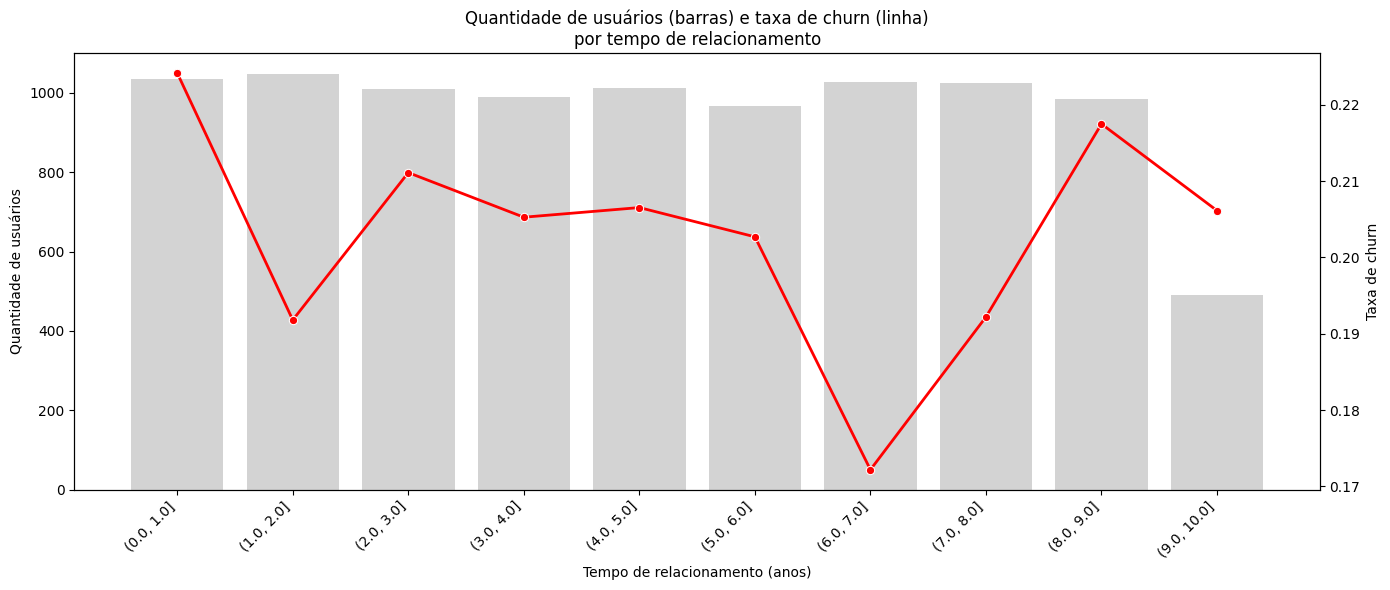

In [ ]:
# contagem de usuários por bin
contagem = (
    df.groupby('tempo_relacionamento_bin', observed=False)
      .size()
      .reset_index(name='usuarios')
)

# juntar taxa + contagem usando os bins já existentes
dados = taxa.merge(
    contagem,
    on='tempo_relacionamento_bin',
    how='inner'
)

# converter intervalo para string (para aparecer no eixo X)
dados['tempo_relacionamento_bin'] = (
    dados['tempo_relacionamento_bin']
    .astype(str)
)

fig, ax1 = plt.subplots(figsize=(14, 6))

# Barras: quantidade de usuários por faixa
sns.barplot(
    data=dados,
    x='tempo_relacionamento_bin',
    y='usuarios',
    ax=ax1,
    color='lightgray'
)

ax1.set_ylabel("Quantidade de usuários")
ax1.set_xlabel("Tempo de relacionamento (anos)")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Segundo eixo: taxa de churn
ax2 = ax1.twinx()

sns.lineplot(
    data=dados,
    x='tempo_relacionamento_bin',
    y='churned',
    ax=ax2,
    color='red',
    marker='o',
    linewidth=2
)

ax2.set_ylabel("Taxa de churn")

plt.title("Quantidade de usuários (barras) e taxa de churn (linha)\npor tempo de relacionamento")
plt.tight_layout()
plt.show()